In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip /content/drive/MyDrive/skin_cancer.zip

Archive:  /content/drive/MyDrive/skin_cancer.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Sk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
# to get and edit(delete,add) the directories
import os
# mathematical related computation
import math
# move file from one folder to other
import shutil
import glob

In [ ]:
#count the no. of images in test_set
test_root="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

#count the no. of images in train_set
train_root="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

In [ ]:
no_of_test_images={}
for dir in os.listdir(test_root):
  no_of_test_images[dir]=len(os.listdir(os.path.join(test_root,dir)))

no_of_train_images={}
for dirr in os.listdir(train_root):
  no_of_train_images[dirr]=len(os.listdir(os.path.join(train_root,dirr)))

In [ ]:
no_of_test_images.items()

dict_items([('basal cell carcinoma', 16), ('pigmented benign keratosis', 16), ('squamous cell carcinoma', 16), ('melanoma', 16), ('vascular lesion', 3), ('dermatofibroma', 16), ('seborrheic keratosis', 3), ('actinic keratosis', 16), ('nevus', 16)])

In [ ]:
no_of_train_images.items()

dict_items([('basal cell carcinoma', 376), ('pigmented benign keratosis', 462), ('squamous cell carcinoma', 181), ('melanoma', 438), ('vascular lesion', 139), ('dermatofibroma', 95), ('seborrheic keratosis', 77), ('actinic keratosis', 114), ('nevus', 357)])

In [120]:
#model building
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Model
from keras.applications.inception_v3 import  InceptionV3,preprocess_input
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import keras

In [134]:
base_model=InceptionV3(input_shape=(256,256,3),include_top=False)
for layer in base_model.layers:
  layer.trainable=False

In [139]:
num_classes=9

X=Flatten()(base_model.output)
X=Dense(units=num_classes,activation='softmax')(X)

#final model
model=Model(base_model.input,X)

#compile
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

#summary
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_478 (Conv2D)         (None, 127, 127, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_470 (B  (None, 127, 127, 32)         96        ['conv2d_478[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_470 (Activation  (None, 127, 127, 32)         0         ['batch_normalization_47

In [140]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 featurewise_center=True,
                                 rotation_range=0.4,
                                 width_shift_range=0.3,
                                 horizontal_flip=True,
                                 zoom_range=0.4,
                                 shear_range=0.4)

train_data=train_datagen.flow_from_directory(train_root,
                                        target_size=(256,256),
                                        batch_size=36)

Found 2239 images belonging to 9 classes.


In [141]:
train_data.class_indices

{'actinic keratosis': 0,
 'basal cell carcinoma': 1,
 'dermatofibroma': 2,
 'melanoma': 3,
 'nevus': 4,
 'pigmented benign keratosis': 5,
 'seborrheic keratosis': 6,
 'squamous cell carcinoma': 7,
 'vascular lesion': 8}

In [142]:
#data visualization
t_img,label=train_data.next()

In [143]:
t_img.shape

(36, 256, 256, 3)

In [144]:
def plotImages(img_arr,label):
  for idx,img in enumerate(img_arr):
    mat.figure(figsize=(5,5))
    mat.imshow(img)
    mat.title(img.shape)
    mat.axis('off')
    mat.show()

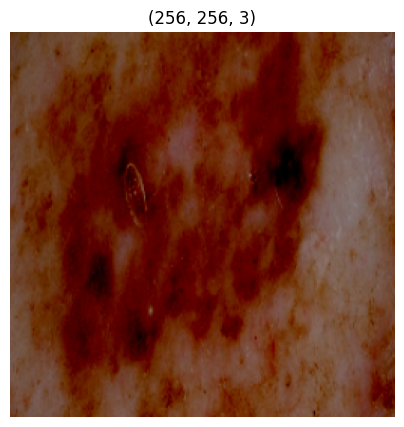

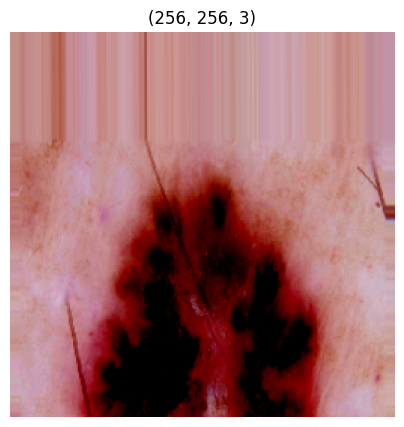

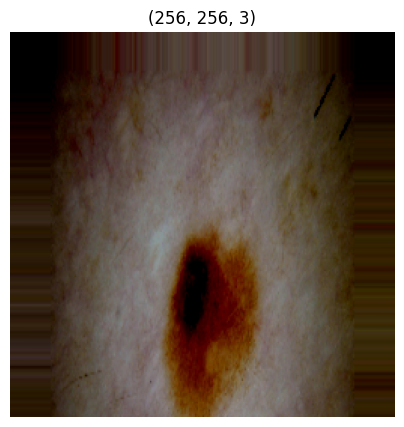

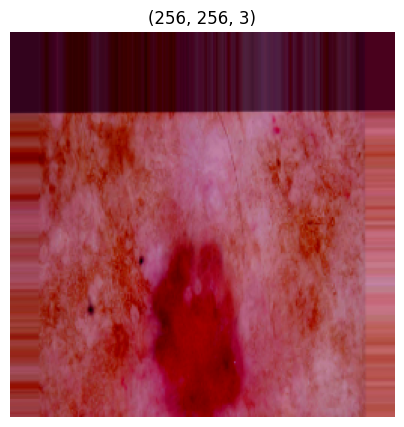

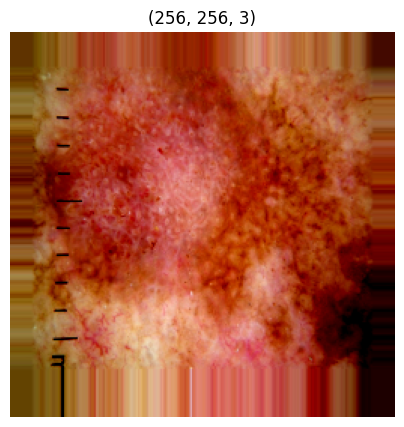

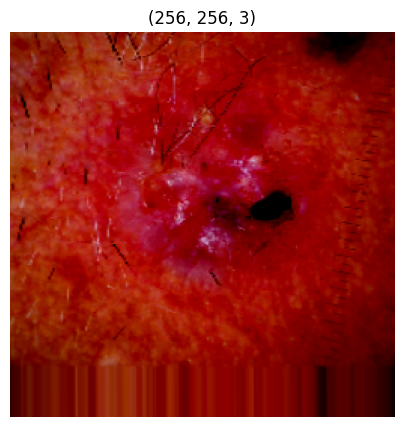

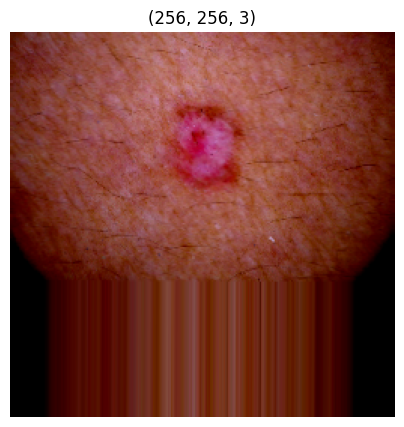

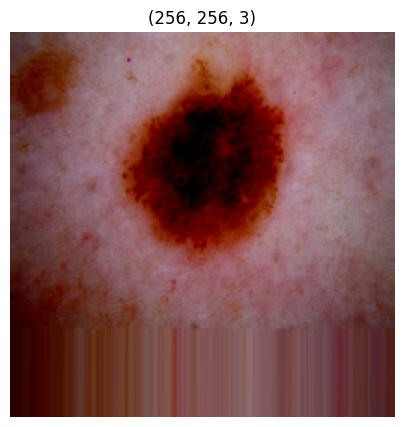

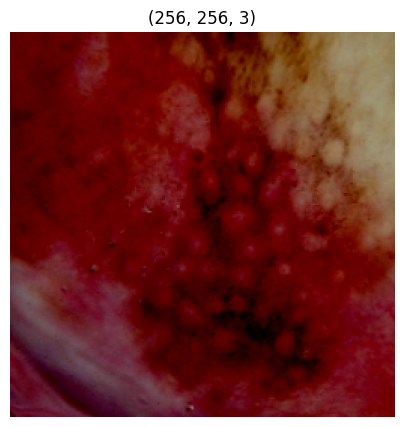

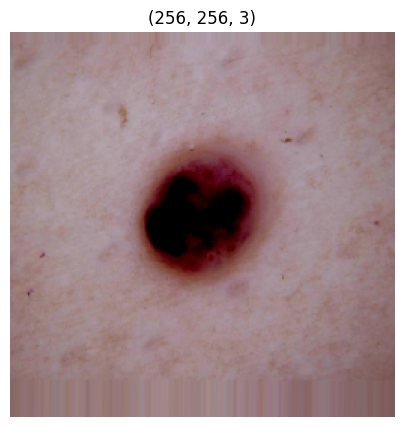

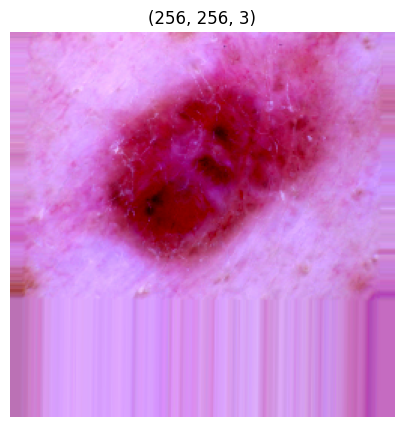

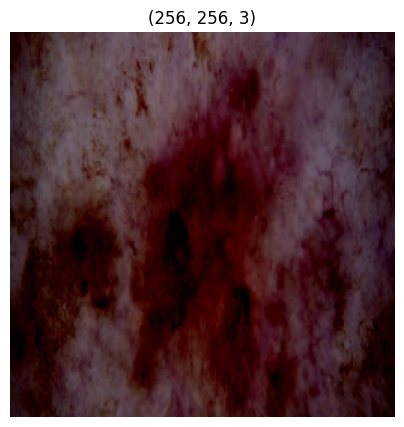

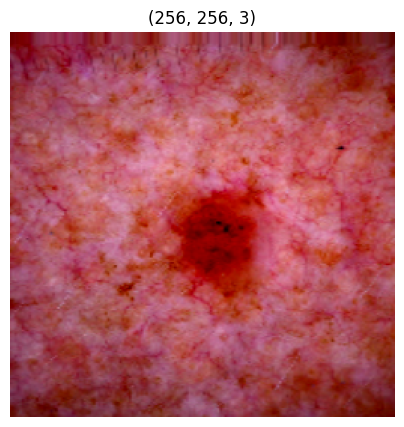

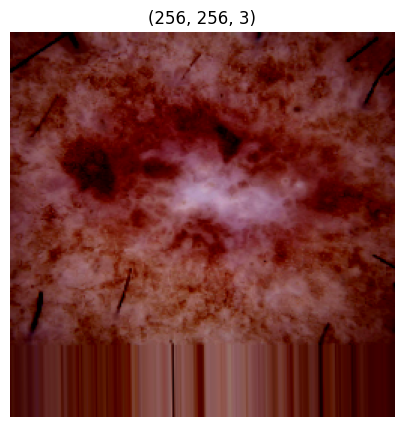

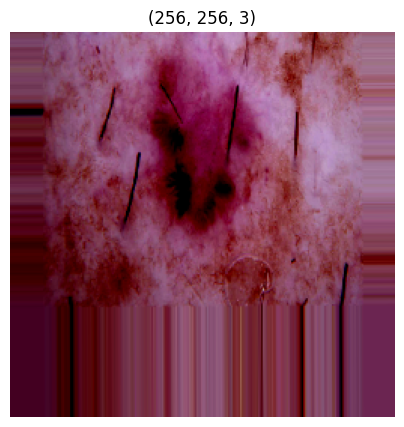

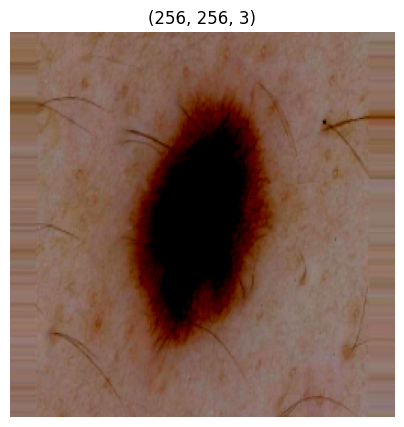

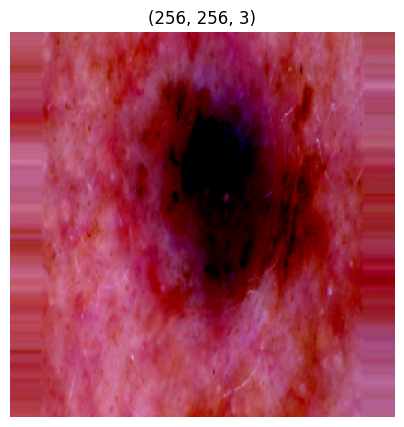

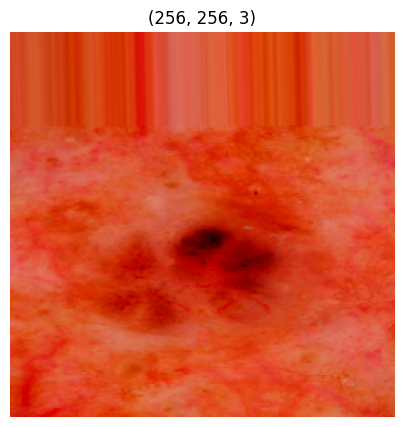

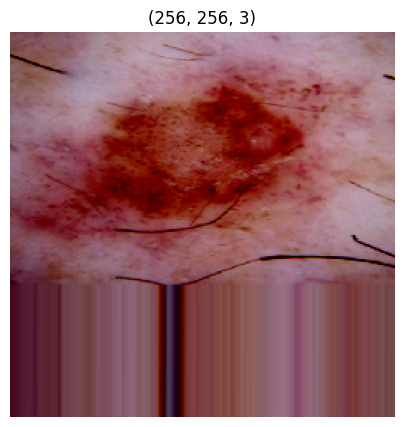

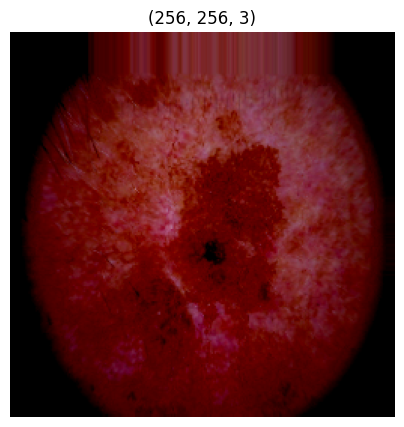

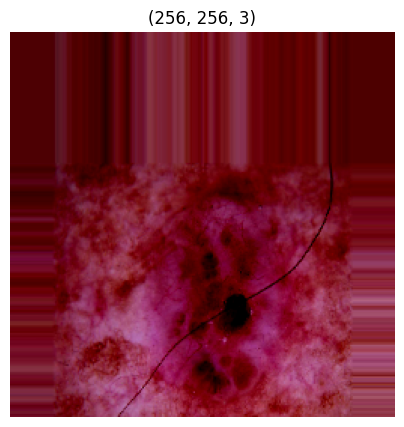

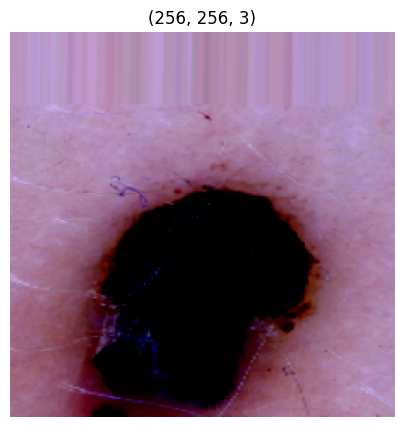

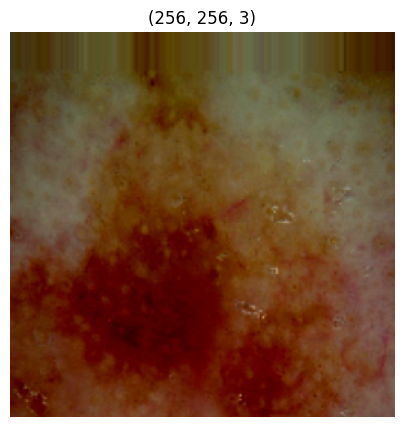

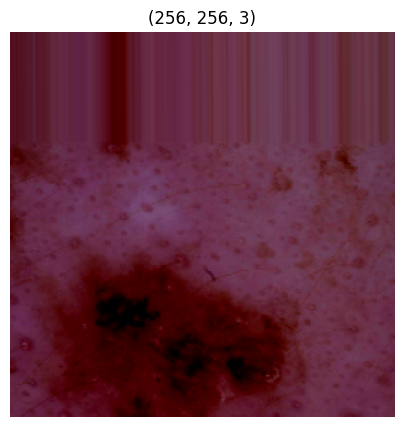

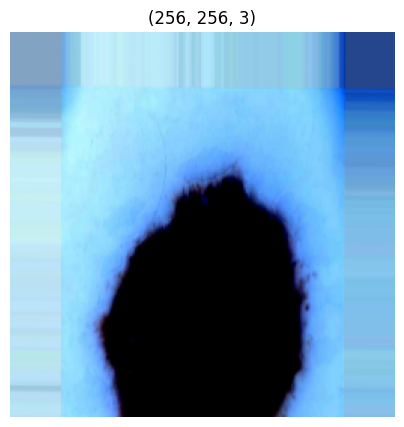

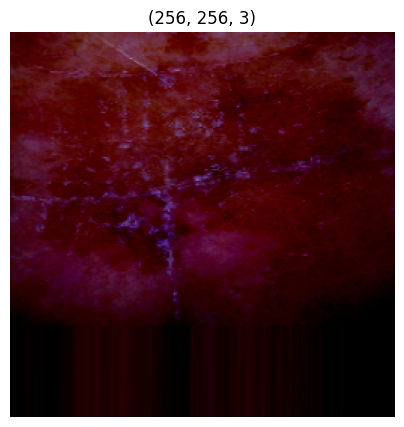

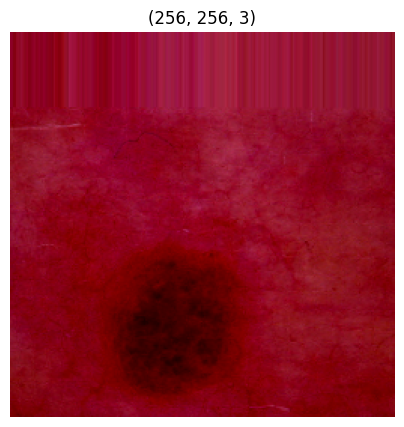

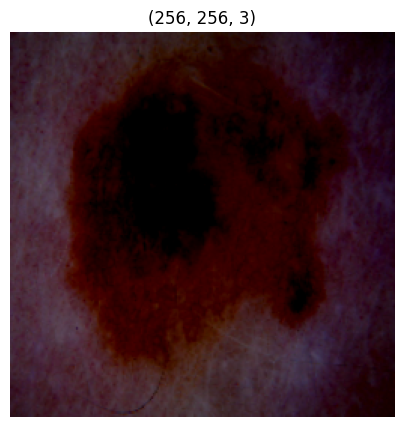

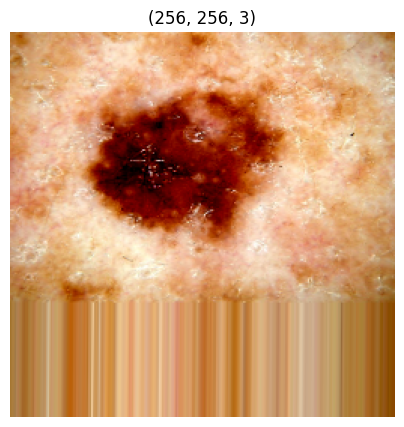

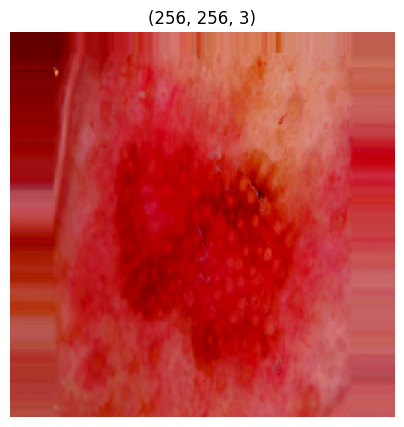

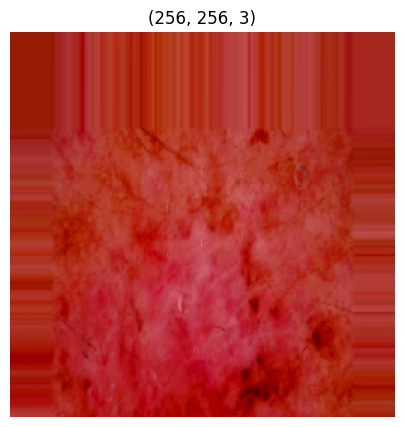

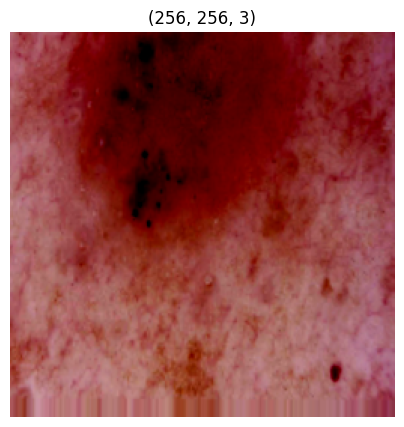

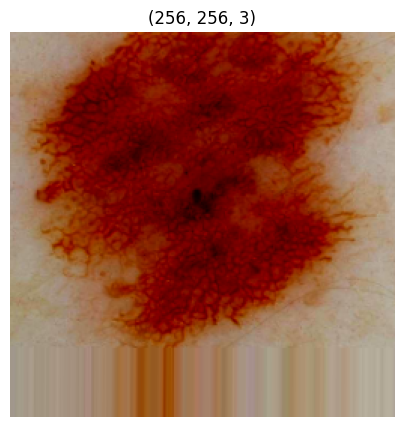

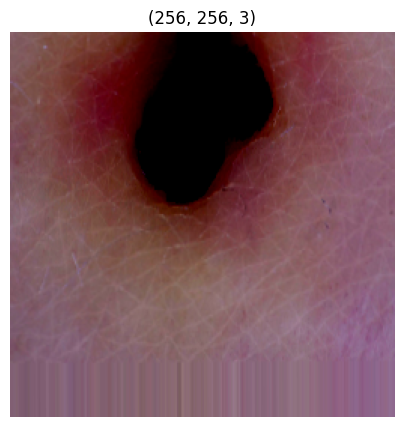

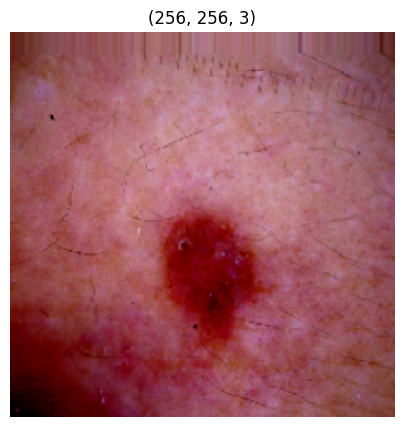

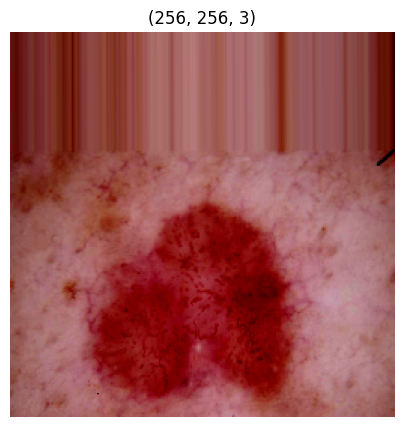

In [145]:
plotImages(t_img, label)

In [151]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [155]:
es=EarlyStopping(monitor='accuracy',
                 min_delta=0.01,
                 verbose=1,
                 patience=5,
                 mode='auto')

mc=ModelCheckpoint(filepath='./best_model.h5',
                   monitor='accuracy',
                   verbose=1,
                   save_best_only=True)

cb=[es,mc]

In [156]:
for x, y in train_data:
    print("Shape of model output:", model.predict(x).shape)
    print("Shape of labels:", y.shape)
    break

2/2 [==============================] - 0s 118ms/step
Shape of model output: (36, 9)
Shape of labels: (36, 9)


In [157]:
hs=model.fit_generator(train_data,
                  steps_per_epoch=12,
                  epochs=60,
                  verbose=1,
                  validation_data=None,
                  callbacks=cb)

Epoch 1/60
12/12 [==============================] - ETA: 0s - loss: 6.2698 - accuracy: 0.4606
Epoch 1: accuracy improved from -inf to 0.46065, saving model to ./best_model.h5
12/12 [==============================] - 12s 977ms/step - loss: 6.2698 - accuracy: 0.4606
Epoch 2/60
12/12 [==============================] - ETA: 0s - loss: 6.6605 - accuracy: 0.4467
Epoch 2: accuracy did not improve from 0.46065
12/12 [==============================] - 9s 707ms/step - loss: 6.6605 - accuracy: 0.4467
Epoch 3/60
12/12 [==============================] - ETA: 0s - loss: 5.1036 - accuracy: 0.5162
Epoch 3: accuracy improved from 0.46065 to 0.51620, saving model to ./best_model.h5
12/12 [==============================] - 11s 881ms/step - loss: 5.1036 - accuracy: 0.5162
Epoch 4/60
12/12 [==============================] - ETA: 0s - loss: 5.4635 - accuracy: 0.4954
Epoch 4: accuracy did not improve from 0.51620
12/12 [==============================] - 12s 1s/step - loss: 5.4635 - accuracy: 0.4954
Epoch 5/6

In [158]:
from keras.models import load_model

model=load_model('/content/best_model.h5')

In [159]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy'])

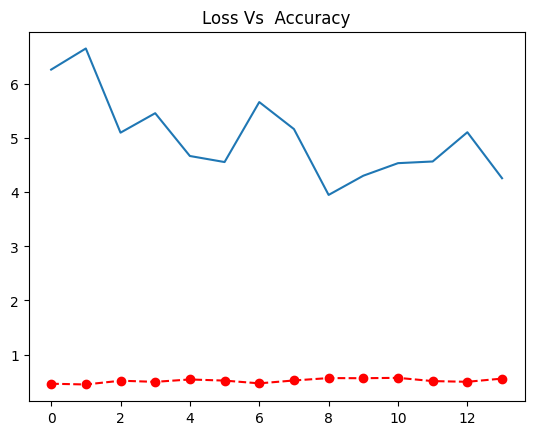

In [160]:
mat.plot(h['accuracy'],'go--',c="red")
mat.plot(h['loss'])

mat.title("Loss Vs  Accuracy")
mat.show()

1/1 [==============================] - 0s 25ms/step


The image is of Pigmented benign keratosis


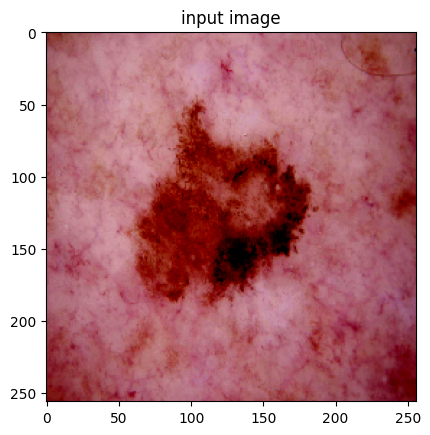

In [169]:
from keras.preprocessing import image
path='/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/pigmented benign keratosis/ISIC_0024358.jpg'
img=image.load_img(path,target_size=(256,256))

i=image.img_to_array(img)
i=preprocess_input(i)

input_arr=np.array([i])
input_arr.shape

pred=np.argmax(model.predict(input_arr))

if pred==0:
  print("The image is of actinic keratosis")
elif pred==1:
  print("The image is of Basal cell carcinoma")
elif pred==2:
  print("The image is of Dermatofibroma")
elif pred==3:
  print("The image is of Melanoma")
elif pred==4:
  print("The image is of Nevus")
elif pred==5:
  print("The image is of Pigmented benign keratosis")
elif pred==6:
  print("The image is of Seborrheic keratosis")
elif pred==7:
  print("The image is of Squamous cell carcinoma")
elif pred==8:
  print("The image is of Vascular lesion")

#to display image
mat.imshow(input_arr[0])
mat.title("input image")
mat.show()